In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

In [6]:
engine = create_engine('sqlite:///db.sqlite3')

In [63]:
df.head()

,id,created_on,scannerLink,exchangerLink,name,symbol,address,networkName_id
0,1,2022-07-27 16:07:22.020779,https://www.bscscan.com/address/0x22E009Ec6B07...,https://poocoin.app/tokens/0x3781e85d0d7e4cdeb...,adwf,gewr,ghewh243tegw,1
1,2,2022-07-27 16:19:16.607399,https://etherscan.io/token/0x0ae0aaf7b92839d69...,https://app.uniswap.org/#/swap?outputCurrency=...,agear,garg,earhearg,2
2,3,2022-07-27 16:39:10.553547,https://app.uniswap.org/#/swap?outputCurrency=...,https://app.uniswap.org/#/swap?outputCurrency=...,gargyh,wertgew,tgwertgwetr,1
3,4,2022-07-27 16:39:23.858115,https://app.uniswap.org/#/swap?outputCurrency=...,https://app.uniswap.org/#/swap?outputCurrency=...,kjrtuki,6reth,jetyketh,1
4,5,2022-07-27 17:36:09.609376,https://etherscan.io/token/0x0ae0aaf7b92839d69...,https://etherscan.io/token/0x0ae0aaf7b92839d69...,gasdfhjrjh,afa,heagasdfsa,1


In [64]:
df = pd.read_sql_table(
    'listOfTokens_bsctoken',
    con=engine
)

In [81]:
df['date'] = pd.to_datetime(df['created_on']).dt.strftime('%Y-%m-%d')

In [151]:
groupby = df.groupby('networkName_id')['networkName_id'].count()

In [152]:
groupby

networkName_id
1    2945
2     477
3     168
4      38
Name: networkName_id, dtype: int64

In [129]:
df['networkName'] = ''

In [153]:
df['networkName'] = np.select(condlist=[df['networkName_id'] == 1,
                                       df['networkName_id'] == 2,
                                       df['networkName_id'] == 3,
                                       df['networkName_id'] == 4],
                             choicelist=['BSC', 'ETH', 'MATIC', 'FTM'] )

In [281]:
df.set_index('created_on')

,id,scannerLink,exchangerLink,name,symbol,address,networkName_id,date,networkName
created_on,,,,,,,,,
2022-07-27 16:07:22.020779,1,https://www.bscscan.com/address/0x22E009Ec6B07...,https://poocoin.app/tokens/0x3781e85d0d7e4cdeb...,adwf,gewr,ghewh243tegw,1,2022-07-27,BSC
2022-07-27 16:19:16.607399,2,https://etherscan.io/token/0x0ae0aaf7b92839d69...,https://app.uniswap.org/#/swap?outputCurrency=...,agear,garg,earhearg,2,2022-07-27,ETH
2022-07-27 16:39:10.553547,3,https://app.uniswap.org/#/swap?outputCurrency=...,https://app.uniswap.org/#/swap?outputCurrency=...,gargyh,wertgew,tgwertgwetr,1,2022-07-27,BSC
2022-07-27 16:39:23.858115,4,https://app.uniswap.org/#/swap?outputCurrency=...,https://app.uniswap.org/#/swap?outputCurrency=...,kjrtuki,6reth,jetyketh,1,2022-07-27,BSC
2022-07-27 17:36:09.609376,5,https://etherscan.io/token/0x0ae0aaf7b92839d69...,https://etherscan.io/token/0x0ae0aaf7b92839d69...,gasdfhjrjh,afa,heagasdfsa,1,2022-07-27,BSC
...,...,...,...,...,...,...,...,...,...
2022-08-18 20:06:12.601533,3624,https://etherscan.io/address/0x60Ee865cc418df5...,https://app.uniswap.org/#/swap?outputCurrency=...,Jumen Grimace,Jūmen,0x60Ee865cc418df5Ca92B7f0E348360469715603F,2,2022-08-18,ETH
2022-08-18 20:06:34.641865,3625,https://etherscan.io/address/0x60Ee865cc418df5...,https://app.uniswap.org/#/swap?outputCurrency=...,Jumen Grimace,Jūmen,0x60Ee865cc418df5Ca92B7f0E348360469715603F,2,2022-08-18,ETH
2022-08-18 20:08:05.556972,3626,https://www.bscscan.com/address/0x0c15C67875F0...,https://poocoin.app/tokens/0x0c15C67875F0fbfd6...,For Ever Doge,For Ever Doge,0x0c15C67875F0fbfd60FAe08769f342c7ba92612D,1,2022-08-18,BSC


In [329]:
newframe = df.groupby(['date', 'networkName']).count()
newframe.rename(columns={'id':'Count'}, inplace=True)
newframe

Count  created_on  scannerLink  exchangerLink  name  \
date       networkName                                                        
2022-07-27 BSC             21          21           21             21    21   
           ETH              1           1            1              1     1   
2022-07-28 BSC             10          10           10             10    10   
2022-07-29 BSC            263         263          263            263   263   
           ETH             68          68           68             68    68   
           FTM              2           2            2              2     2   
           MATIC           37          37           37             37    37   
2022-07-30 BSC            646         646          646            646   646   
           ETH             25          25           25             25    25   
           FTM             12          12           12             12    12   
2022-08-03 BSC              3           3            3              3     3   
           ETH              1           1            1              1     1   
           MATIC            1           1            1              1     1   
2022-08-08 BSC            183         183          183            183   183   
           ETH             16          16           16             16    16   
           FTM              2           2            2              2     2   
           MATIC           28          28           28             28    28   
2022-08-09 BSC             26          26           26             26    26   
           ETH              5           5            5              5     5   
           MATIC            7           7            7              7     7   
2022-08-10 BSC            615         615          615            615   615   
           ETH             82          82           82             82    82   
           FTM             19          19           19             19    19   
           MATIC           41          41           41             41    41   
2022-08-11 BSC            479         479          479            479   479   
           ETH             81          81           81             81    81   
           MATIC           17          17           17             17    17   
2022-08-12 BSC             52          52           52             52    52   
           ETH             18          18           18             18    18   
           MATIC           28          28           28             28    28   
2022-08-17 BSC             53          53           53             53    53   
           ETH             26          26           26             26    26   
           MATIC            2           2            2              2     2   
2022-08-18 BSC            594         594          594            594   594   
           ETH            154         154          154            154   154   
           FTM              3           3            3              3     3   
           MATIC            7           7            7              7     7   

                        symbol  address  networkName_id  
date       networkName                                   
2022-07-27 BSC              21       21              21  
           ETH               1        1               1  
2022-07-28 BSC              10       10              10  
2022-07-29 BSC             263      263             263  
           ETH              68       68              68  
           FTM               2        2               2  
           MATIC            37       37              37  
2022-07-30 BSC             646      646             646  
           ETH              25       25              25  
           FTM              12       12              12  
2022-08-03 BSC               3        3               3  
           ETH               1        1               1  
           MATIC             1        1               1  
2022-08-08 BSC             183      183             183  
           ETH

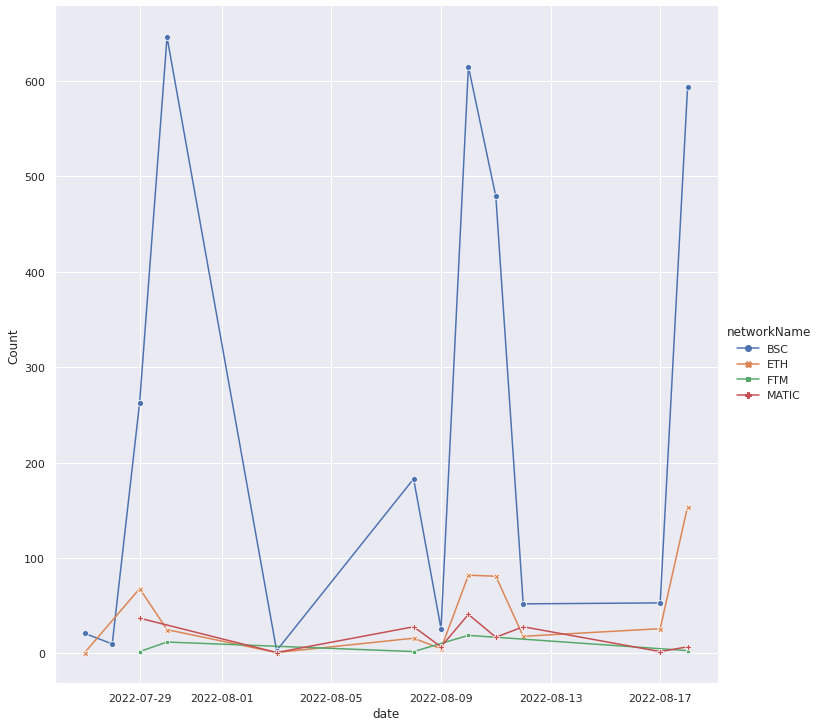

In [333]:
sns.relplot(x='date', y='Count', kind='line', hue='networkName', markers=True, dashes=False, style='networkName', data=newframe, height=10.27, aspect=8.27/8.27)

In [219]:
df['created_on']

0      2022-07-27 16:07:22.020779
1      2022-07-27 16:19:16.607399
2      2022-07-27 16:39:10.553547
3      2022-07-27 16:39:23.858115
4      2022-07-27 17:36:09.609376
                  ...            
3623   2022-08-18 20:06:12.601533
3624   2022-08-18 20:06:34.641865
3625   2022-08-18 20:08:05.556972
3626   2022-08-18 20:09:19.052303
3627   2022-08-18 20:11:08.867791
Name: created_on, Length: 3628, dtype: datetime64[ns]